In [22]:
import pandas as pd    
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv("data.csv")
df.head()

,weight,size,class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [24]:
from sklearn.preprocessing import LabelEncoder
s_to_n = LabelEncoder()
df["class"] = s_to_n.fit_transform(df["class"])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:2], df.iloc[:,2], test_size=0.25)

In [26]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [27]:
classifier = SVC(kernel="linear")
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [28]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 0])

In [29]:
#classifier.score(y_test, y_pred)
#help(classifier.score)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy of SVM For the given dataset:", accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



Accuracy of SVM For the given dataset: 1.0


1.0

In [30]:
print(y_pred, y_test)

[0 1 0 0] 6     0
4     1
10    0
5     0
Name: class, dtype: int64


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


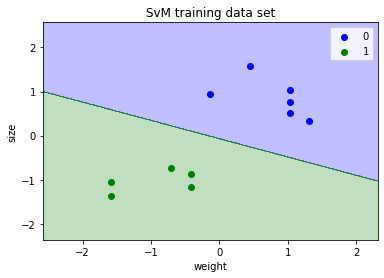

In [36]:
import numpy as np
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.01), np.arange(start = x_train[:,1].min()-1, stop = x_train[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.25, cmap = ListedColormap(('blue', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter( x_set[y_set==j, 0], x_set[y_set==j, 1], c=ListedColormap(("blue","green"))(i), label=j)
plt.title("SvM training data set")
plt.xlabel("weight")
plt.ylabel("size")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


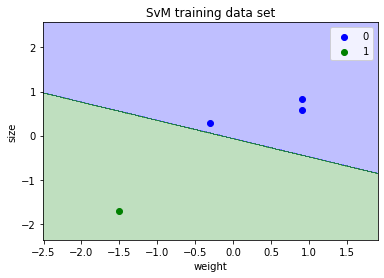

In [37]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.01), np.arange(start = x_train[:,1].min()-1, stop = x_train[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.25, cmap = ListedColormap(('blue', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter( x_set[y_set==j, 0], x_set[y_set==j, 1], c=ListedColormap(("blue","green"))(i), label=j)
plt.title("SvM training data set")
plt.xlabel("weight")
plt.ylabel("size")
plt.legend()
plt.show()
